Arbitrage opportunity: Buy GEVO in the US and sell ZGV3.F in Europe.


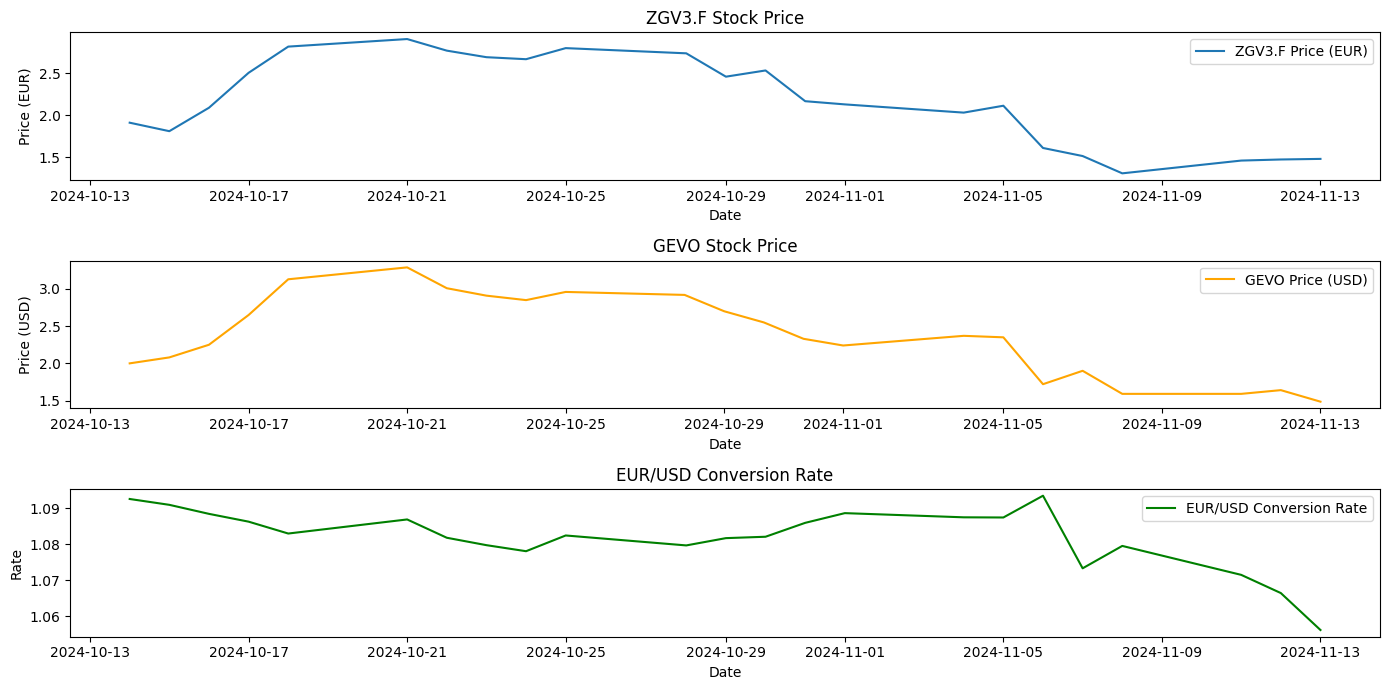

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

def check_arbitrage_and_plot(euro_stock_symbol, us_stock_symbol):
    # Fetch European stock data
    euro_stock = yf.Ticker(euro_stock_symbol)
    euro_stock_data = euro_stock.history(period='1mo')
    euro_price = euro_stock_data['Close'].iloc[-1]

    # Fetch US stock data
    us_stock = yf.Ticker(us_stock_symbol)
    us_stock_data = us_stock.history(period='1mo')
    us_price = us_stock_data['Close'].iloc[-1]

    # Fetch conversion rate from EUR to USD using yfinance
    conversion_rate_ticker = yf.Ticker('EURUSD=X')
    conversion_rate_data = conversion_rate_ticker.history(period='1mo')
    conversion_rate = conversion_rate_data['Close'].iloc[-1]

    # Convert European stock price to USD
    euro_price_in_usd = euro_price * conversion_rate

    # Check for arbitrage opportunity
    if euro_price_in_usd < us_price:
        print(f"Arbitrage opportunity: Buy {euro_stock_symbol} in Europe and sell {us_stock_symbol} in the US.")
    elif euro_price_in_usd > us_price:
        print(f"Arbitrage opportunity: Buy {us_stock_symbol} in the US and sell {euro_stock_symbol} in Europe.")
    else:
        print("No arbitrage opportunity.")

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plot European stock prices
    plt.subplot(3, 1, 1)
    plt.plot(euro_stock_data.index, euro_stock_data['Close'], label=f'{euro_stock_symbol} Price (EUR)')
    plt.title(f'{euro_stock_symbol} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (EUR)')
    plt.legend()

    # Plot US stock prices
    plt.subplot(3, 1, 2)
    plt.plot(us_stock_data.index, us_stock_data['Close'], label=f'{us_stock_symbol} Price (USD)', color='orange')
    plt.title(f'{us_stock_symbol} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    # Plot conversion rate
    plt.subplot(3, 1, 3)
    plt.plot(conversion_rate_data.index, conversion_rate_data['Close'], label='EUR/USD Conversion Rate', color='green')
    plt.title('EUR/USD Conversion Rate')
    plt.xlabel('Date')
    plt.ylabel('Rate')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
check_arbitrage_and_plot('ZGV3.F', 'GEVO')

Arbitrage opportunity: Buy BMW.DE in Europe and sell TSLA in the US.
Price difference in Euro: nan EUR


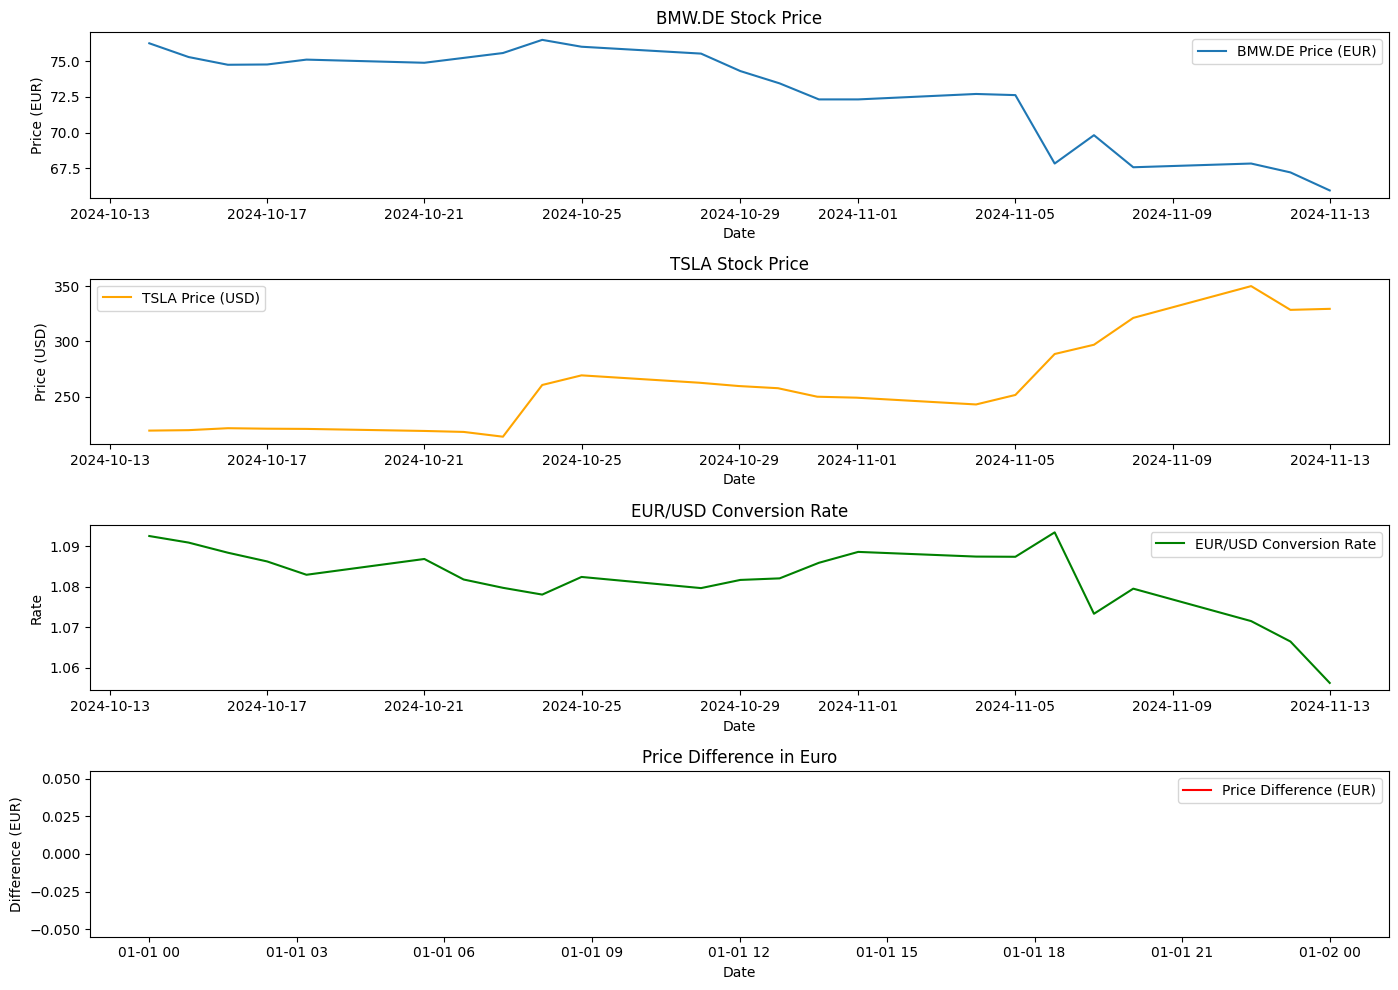

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

def check_arbitrage_and_plot(euro_stock_symbol, us_stock_symbol):
    # Fetch European stock data
    euro_stock = yf.Ticker(euro_stock_symbol)
    euro_stock_data = euro_stock.history(period='1mo')
    euro_price = euro_stock_data['Close'].iloc[-1]

    # Fetch US stock data
    us_stock = yf.Ticker(us_stock_symbol)
    us_stock_data = us_stock.history(period='1mo')
    us_price = us_stock_data['Close'].iloc[-1]

    # Fetch conversion rate from EUR to USD using yfinance
    conversion_rate_ticker = yf.Ticker('EURUSD=X')
    conversion_rate_data = conversion_rate_ticker.history(period='1mo')
    conversion_rate = conversion_rate_data['Close'].iloc[-1]

    # Convert US stock prices to EUR
    us_prices_in_euro = us_stock_data['Close'] / conversion_rate

    # Calculate the difference in price in Euro
    price_difference_in_euro = euro_stock_data['Close'] - us_prices_in_euro

    # Check for arbitrage opportunity
    if euro_price < us_price / conversion_rate:
        print(f"Arbitrage opportunity: Buy {euro_stock_symbol} in Europe and sell {us_stock_symbol} in the US.")
    elif euro_price > us_price / conversion_rate:
        print(f"Arbitrage opportunity: Buy {us_stock_symbol} in the US and sell {euro_stock_symbol} in Europe.")
    else:
        print("No arbitrage opportunity.")

    print(f"Price difference in Euro: {price_difference_in_euro.iloc[-1]:.2f} EUR")

    # Plotting
    plt.figure(figsize=(14, 10))

    # Plot European stock prices
    plt.subplot(4, 1, 1)
    plt.plot(euro_stock_data.index, euro_stock_data['Close'], label=f'{euro_stock_symbol} Price (EUR)')
    plt.title(f'{euro_stock_symbol} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (EUR)')
    plt.legend()

    # Plot US stock prices
    plt.subplot(4, 1, 2)
    plt.plot(us_stock_data.index, us_stock_data['Close'], label=f'{us_stock_symbol} Price (USD)', color='orange')
    plt.title(f'{us_stock_symbol} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    # Plot conversion rate
    plt.subplot(4, 1, 3)
    plt.plot(conversion_rate_data.index, conversion_rate_data['Close'], label='EUR/USD Conversion Rate', color='green')
    plt.title('EUR/USD Conversion Rate')
    plt.xlabel('Date')
    plt.ylabel('Rate')
    plt.legend()

    # Plot price difference in Euro
    plt.subplot(4, 1, 4)
    plt.plot(price_difference_in_euro.index, price_difference_in_euro, label='Price Difference (EUR)', color='red')
    plt.title('Price Difference in Euro')
    plt.xlabel('Date')
    plt.ylabel('Difference (EUR)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
check_arbitrage_and_plot('BMW.DE', 'TSLA')

Index(['Date_US', 'Close_US', 'Day', 'Date_Euro', 'Close_Euro',
       'Conversion Rate', 'US Stock in Euro', 'Price Difference in Euro'],
      dtype='object')
Arbitrage opportunity: Buy ZGV3.F in Europe and sell GEVO in the US.
Price difference in Euro: -0.06 EUR


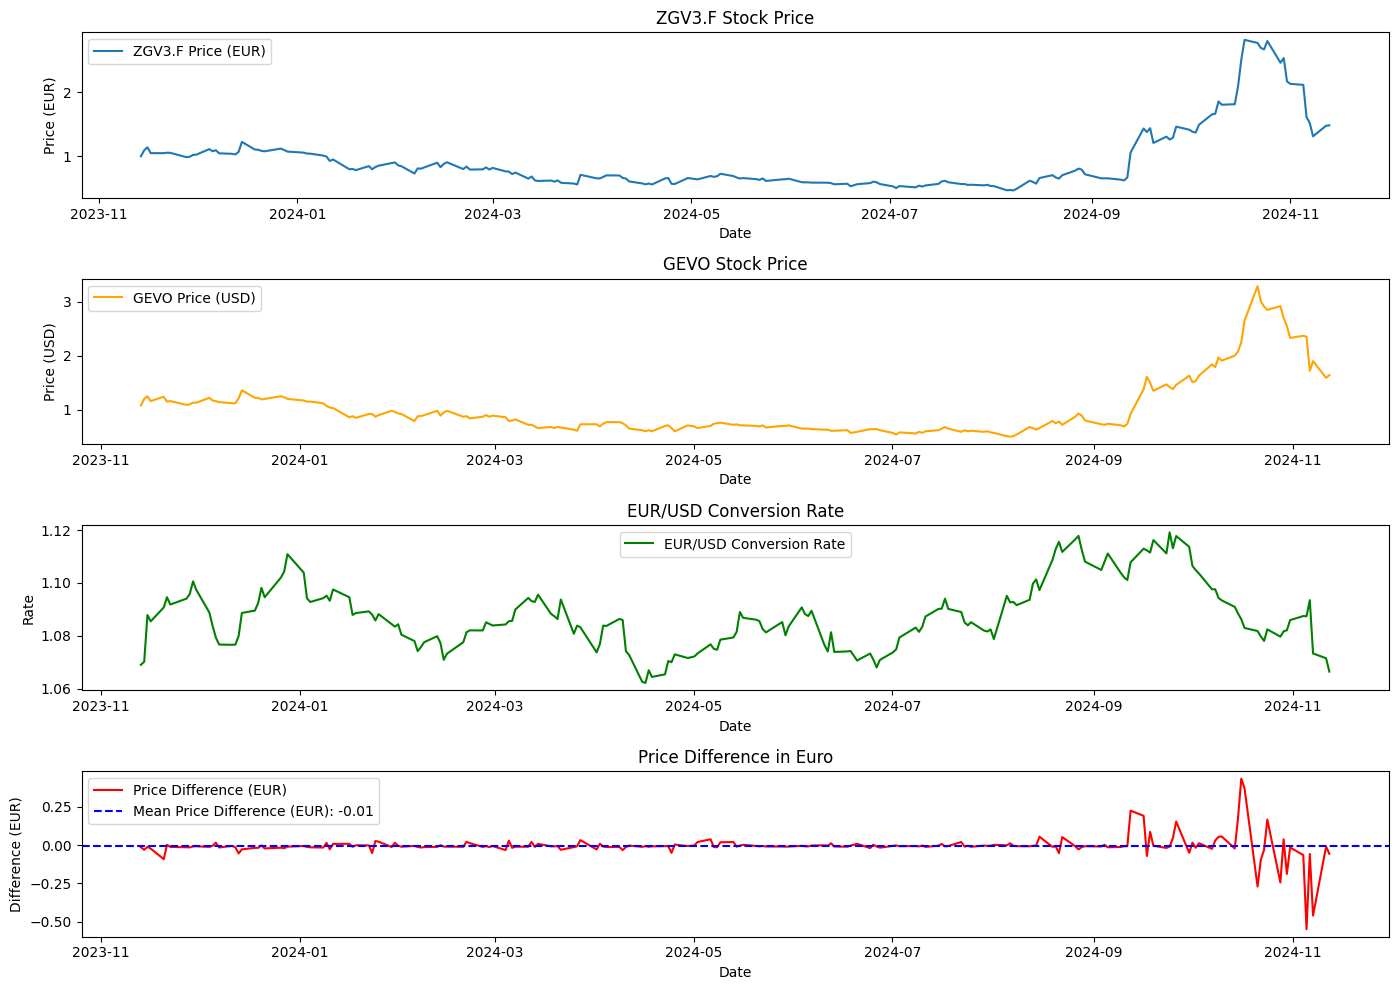

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def check_arbitrage_and_plot(euro_stock_symbol, us_stock_symbol, period='1y'):
    # Fetch US stock data
    us_stock = yf.Ticker(us_stock_symbol)
    us_stock_data = us_stock.history(period=period)['Close'].reset_index()

    # Convert the date column to UTC timezone
    us_stock_data['Date'] = us_stock_data['Date'].dt.tz_convert('UTC')
    us_stock_data['Day'] = us_stock_data['Date'].dt.date

    # Fetch European stock data
    euro_stock = yf.Ticker(euro_stock_symbol)
    euro_stock_data = euro_stock.history(period=period)['Close'].reset_index()

    # Convert the date column to UTC timezone
    euro_stock_data['Date'] = euro_stock_data['Date'].dt.tz_convert('UTC')
    euro_stock_data['Day'] = euro_stock_data['Date'].dt.date

    # Fetch conversion rate from EUR to USD using yfinance
    conversion_rate_ticker = yf.Ticker('EURUSD=X')
    conversion_rate_data = conversion_rate_ticker.history(period=period)['Close'].reset_index()
    conversion_rate_data['Date'] = conversion_rate_data['Date'].dt.tz_convert('UTC')
    conversion_rate_data['Day'] = conversion_rate_data['Date'].dt.date

    # Merge the data on the 'Day' column
    combined_data = pd.merge(us_stock_data, euro_stock_data, on='Day', suffixes=('_US', '_Euro'))
    combined_data = pd.merge(combined_data, conversion_rate_data, on='Day')
    combined_data.rename(columns={'Close': 'Conversion Rate'}, inplace=True)
    combined_data.drop(columns=['Date'], inplace=True)

    # Convert US stock prices to EUR
    combined_data['US Stock in Euro'] = combined_data['Close_US'] / combined_data['Conversion Rate']

    # Calculate the difference in price in Euro
    combined_data['Price Difference in Euro'] = combined_data['Close_Euro'] - combined_data['US Stock in Euro']
    print(combined_data.columns)

    # Check for arbitrage opportunity
    latest_data = combined_data.iloc[-1]
    if latest_data['Close_Euro'] < latest_data['US Stock in Euro']:
        print(f"Arbitrage opportunity: Buy {euro_stock_symbol} in Europe and sell {us_stock_symbol} in the US.")
    elif latest_data['Close_Euro'] > latest_data['US Stock in Euro']:
        print(f"Arbitrage opportunity: Buy {us_stock_symbol} in the US and sell {euro_stock_symbol} in Europe.")
    else:
        print("No arbitrage opportunity.")

    print(f"Price difference in Euro: {latest_data['Price Difference in Euro']:.2f} EUR")

    # Plotting
    plt.figure(figsize=(14, 10))

    # Plot European stock prices
    plt.subplot(4, 1, 1)
    plt.plot(combined_data['Date_Euro'], combined_data['Close_Euro'], label=f'{euro_stock_symbol} Price (EUR)')
    plt.title(f'{euro_stock_symbol} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (EUR)')
    plt.legend()

    # Plot US stock prices
    plt.subplot(4, 1, 2)
    plt.plot(combined_data['Date_US'], combined_data['Close_US'], label=f'{us_stock_symbol} Price (USD)', color='orange')
    plt.title(f'{us_stock_symbol} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()

    # Plot conversion rate
    plt.subplot(4, 1, 3)
    plt.plot(combined_data['Date_US'], combined_data['Conversion Rate'], label='EUR/USD Conversion Rate', color='green')
    plt.title('EUR/USD Conversion Rate')
    plt.xlabel('Date')
    plt.ylabel('Rate')
    plt.legend()

    # Plot price difference in Euro
    plt.subplot(4, 1, 4)
    plt.plot(combined_data['Date_US'], combined_data['Price Difference in Euro'], label='Price Difference (EUR)', color='red')
    
    # Calculate and plot the mean of the price difference
    mean_price_difference = combined_data['Price Difference in Euro'].mean()
    plt.axhline(mean_price_difference, color='blue', linestyle='--', label=f'Mean Price Difference (EUR): {mean_price_difference:.2f}')
    
    plt.title('Price Difference in Euro')
    plt.xlabel('Date')
    plt.ylabel('Difference (EUR)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
check_arbitrage_and_plot('ZGV3.F', 'GEVO')

In [47]:
#A simpler version to check the updated status get the latest data from yahoo finance and plot it.


import yfinance as yf
import matplotlib.pyplot as plt

def check_latest_arbitrage(euro_stock_symbol, us_stock_symbol):
    # Fetch the latest European stock data with 20-minute intervals
    euro_stock = yf.Ticker(euro_stock_symbol)
    euro_stock_data = euro_stock.history(period='1d', interval='15m')['Close']
    last_euro_stock_data = euro_stock_data.iloc[-1]
    print('last_euro_stock_data', last_euro_stock_data)

    # Fetch the latest US stock data with 20-minute intervals
    us_stock = yf.Ticker(us_stock_symbol)
    us_stock_data = us_stock.history(period='1d', interval='15m')['Close']
    last_us_stock_data = us_stock_data.iloc[-1]
    print('last_us_stock_data', last_us_stock_data)

    # Fetch the latest conversion rate from EUR to USD with 20-minute intervals
    conversion_rate_ticker = yf.Ticker('EURUSD=X')
    conversion_rate_data = conversion_rate_ticker.history(period='1d', interval='1h')['Close']
    last_conversion_rate_data = conversion_rate_data.iloc[-1]
    print('last_conversion_rate_data', last_conversion_rate_data, 'updated at', conversion_rate_data.index[-1])
  

    # Convert US stock prices to EUR
    last_usd_prices_in_euro = last_us_stock_data / last_conversion_rate_data

    last_mean_price = (last_euro_stock_data + last_usd_prices_in_euro) / 2
    last_difference = last_euro_stock_data - last_usd_prices_in_euro 
    last_relative_difference = 100 * last_difference / last_mean_price


    print(f"usd_prices_in_euro: {last_usd_prices_in_euro} updated at {us_stock_data.index[-1]}\n"
          f"euro_stock_data: {last_euro_stock_data} updated at {euro_stock_data.index[-1]}\n"
          f"difference: {last_difference}\n"
          f"mean_price: {last_mean_price}\n"
          f"relative_difference: {last_relative_difference}")
    ## Plotting the latest 10 data points
    #plt.figure(figsize=(12, 6))
#
    #plt.plot(euro_stock_data.index, euro_prices_in_usd, label=f'{euro_stock_symbol} Price (USD)', color='blue')
    #plt.plot(us_stock_data.index, us_stock_data, label=f'{us_stock_symbol} Price (USD)', color='orange')
#
    #plt.title('Latest 10 Data Points Comparison (20-min Interval)')
    #plt.xlabel('Time')
    #plt.ylabel('Price (USD)')
    #plt.legend()
    #plt.xticks(rotation=45)
    #plt.tight_layout()
    #plt.show()

# Example usage
check_latest_arbitrage('ZGV3.F', 'GEVO')



last_euro_stock_data 1.4809999465942383
last_us_stock_data 1.4149999618530273
last_conversion_rate_data 1.056747317314148 updated at 2024-11-13 21:00:00+00:00
usd_prices_in_euro: 1.3390144821464247 updated at 2024-11-13 15:45:00-05:00
euro_stock_data: 1.4809999465942383 updated at 2024-11-13 13:30:00+01:00
difference: 0.14198546444781357
mean_price: 1.4100072143703315
relative_difference: 10.069839572503193
